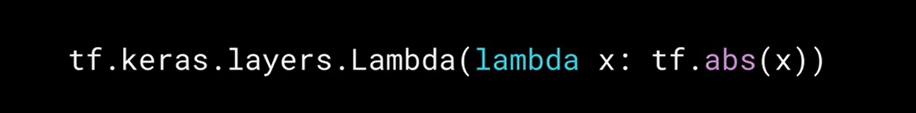
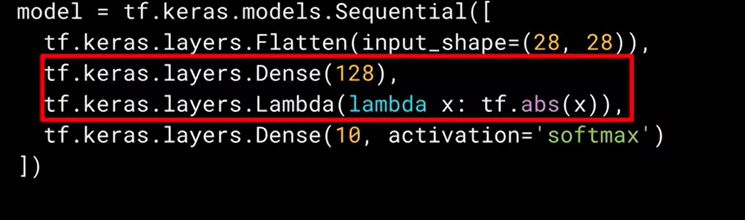
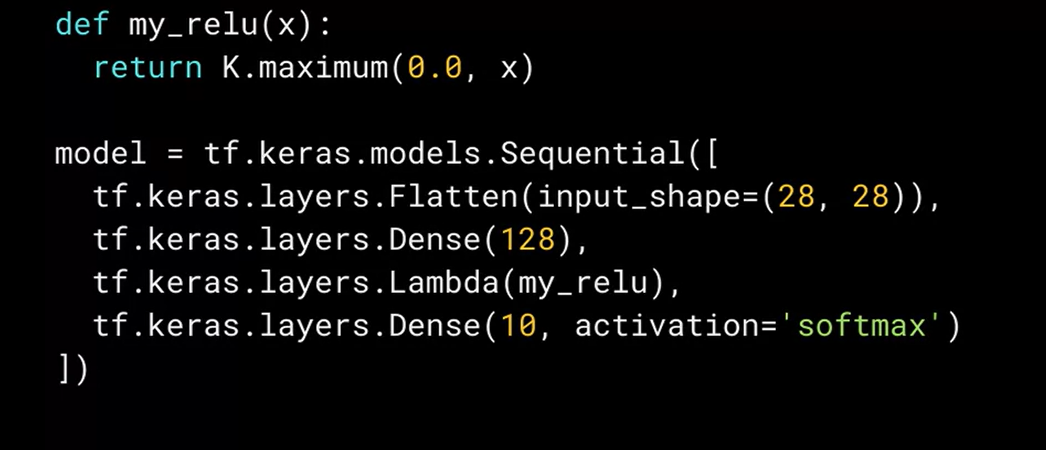
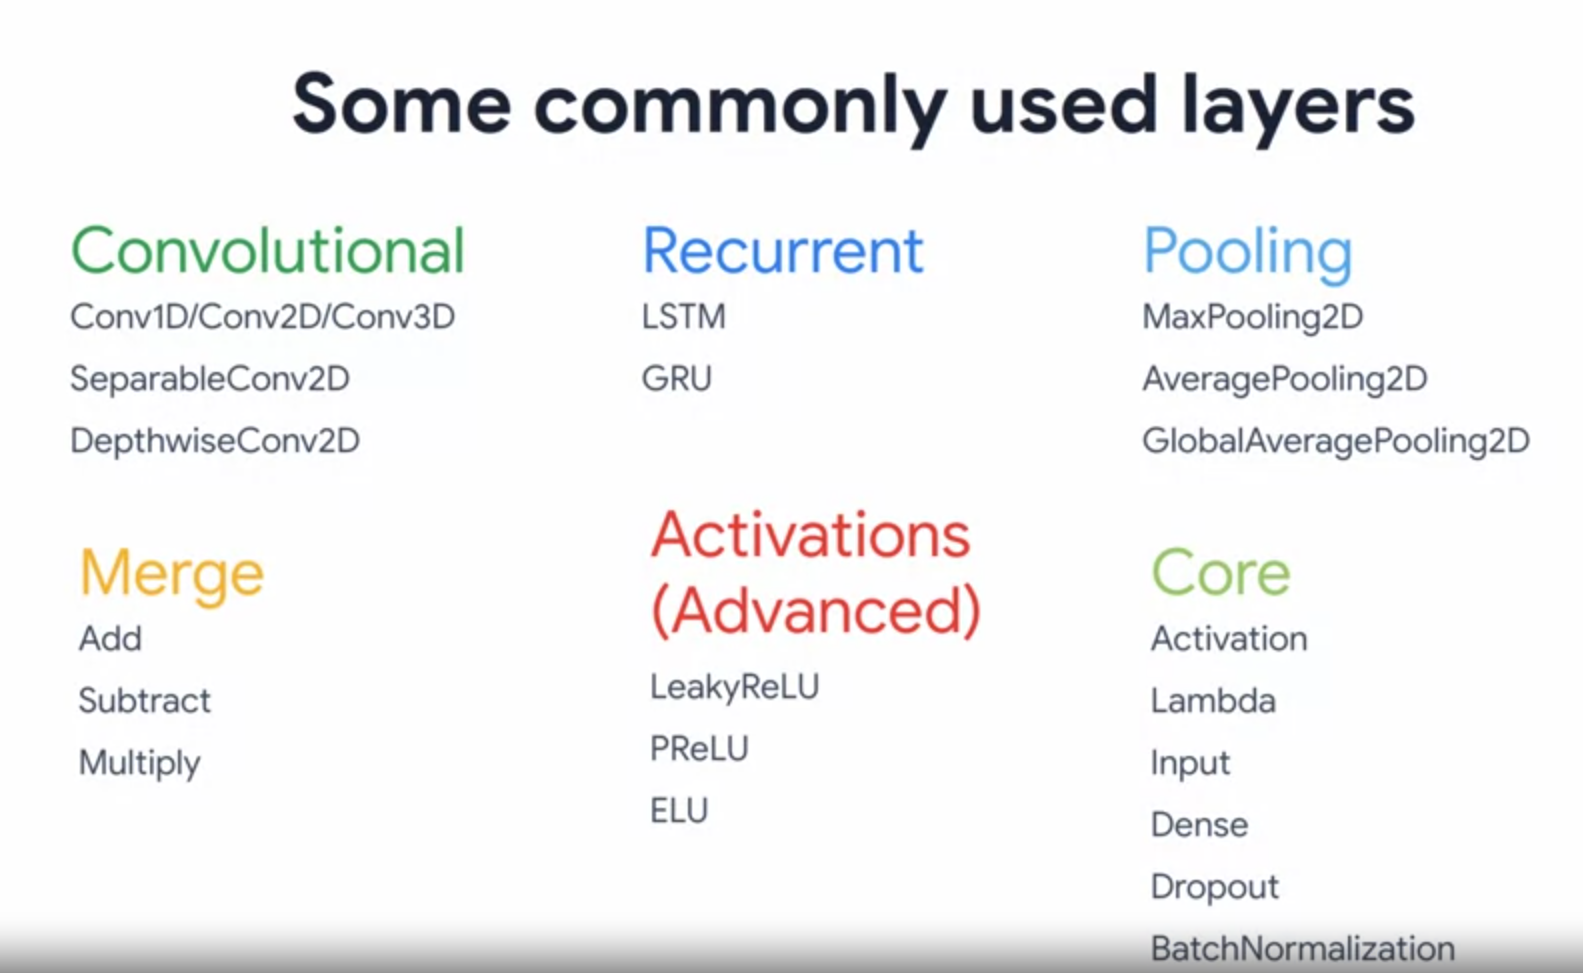
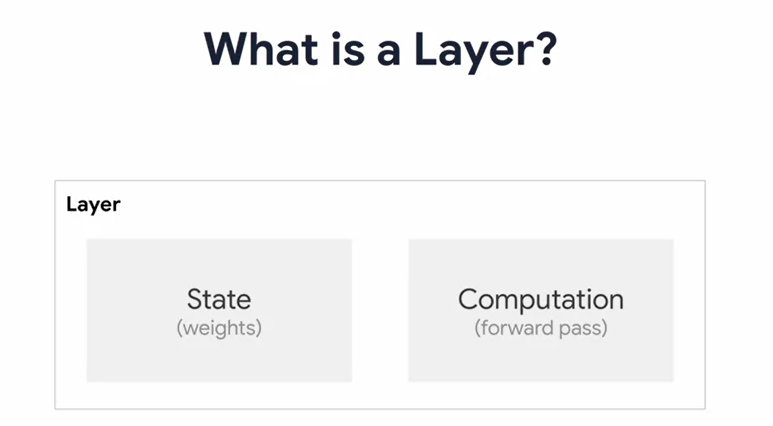
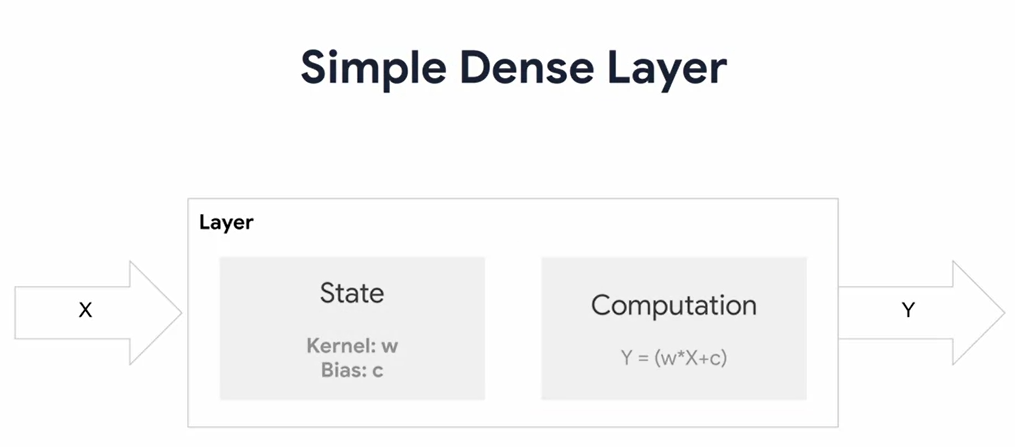
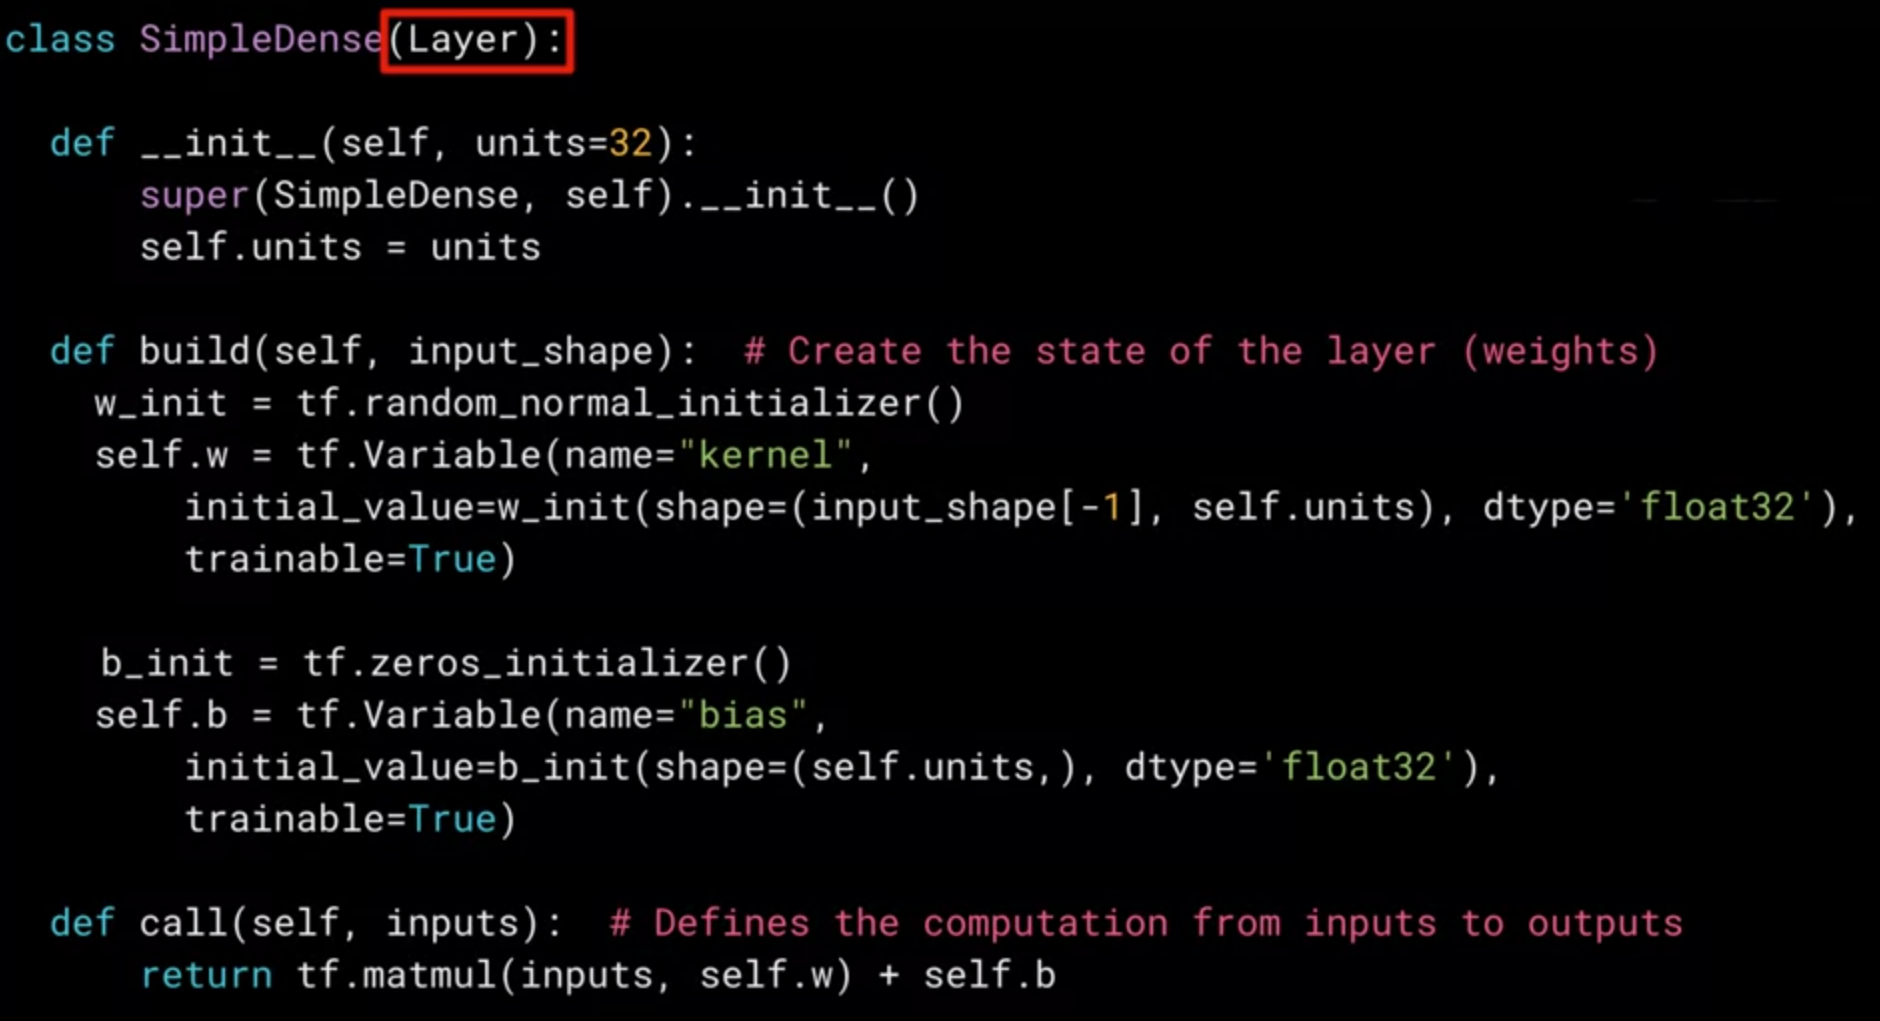
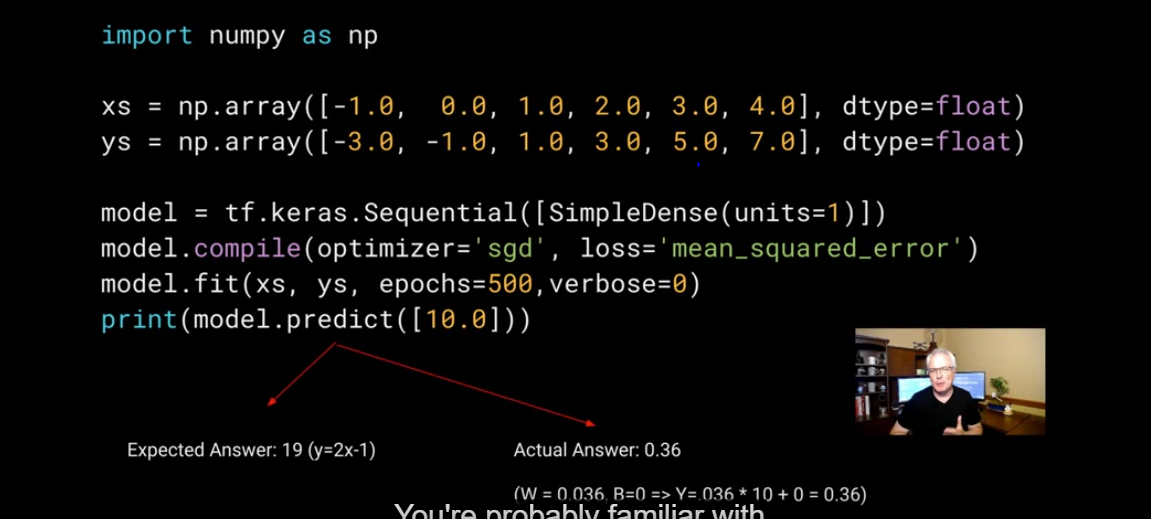
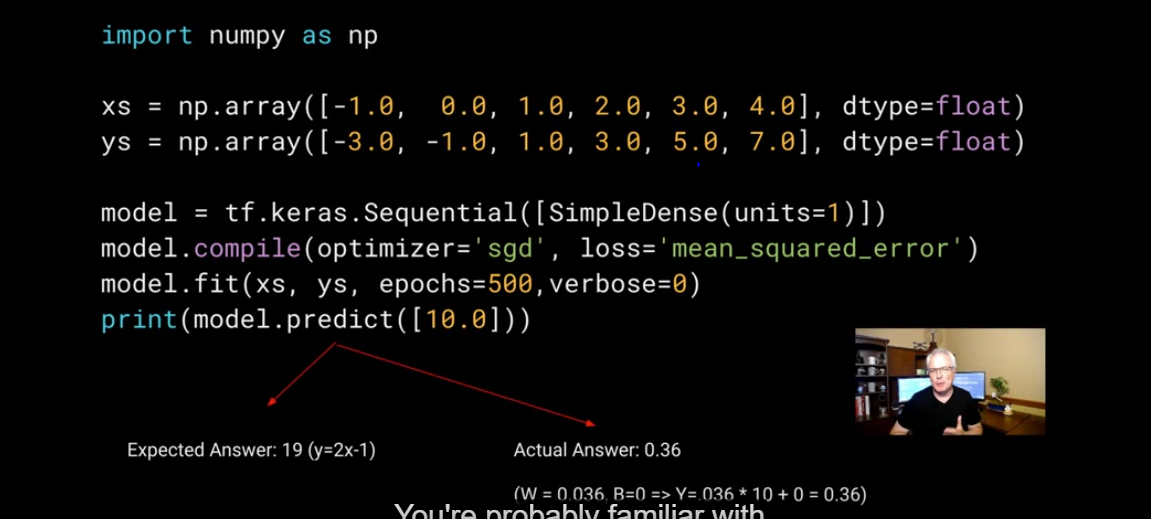
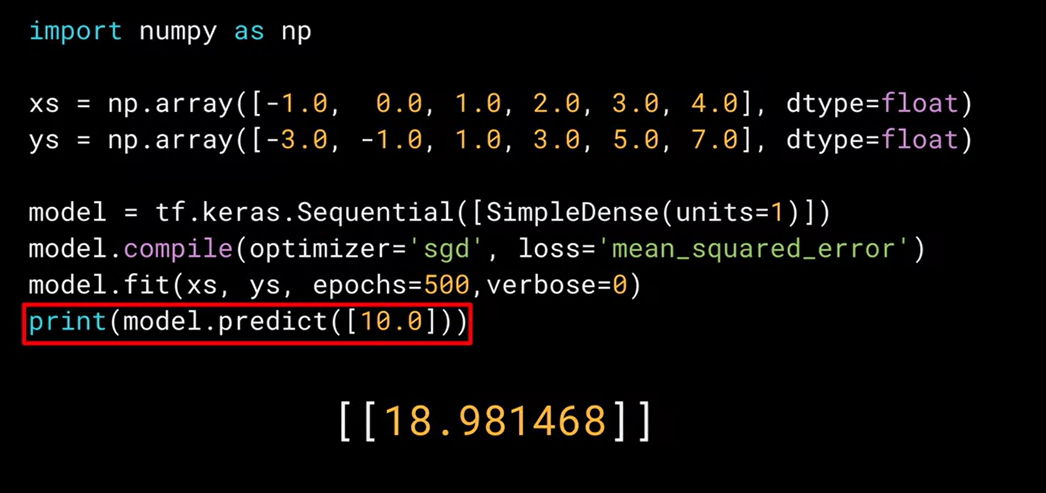
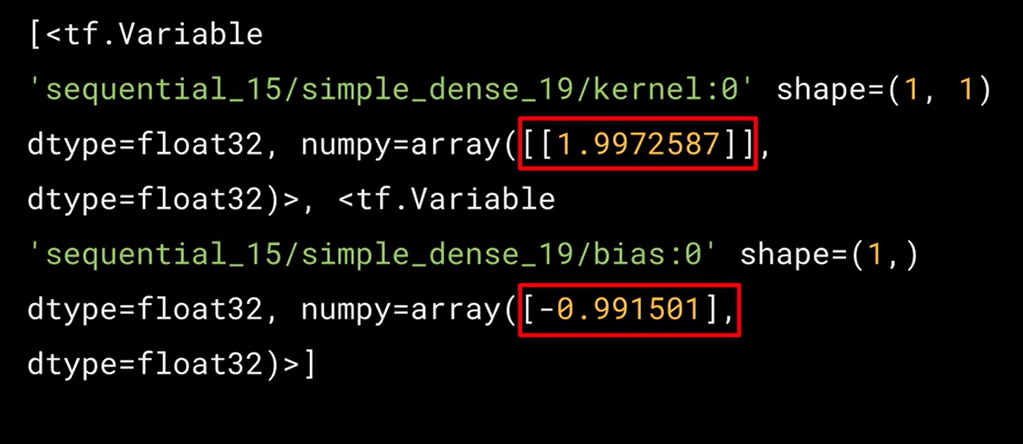
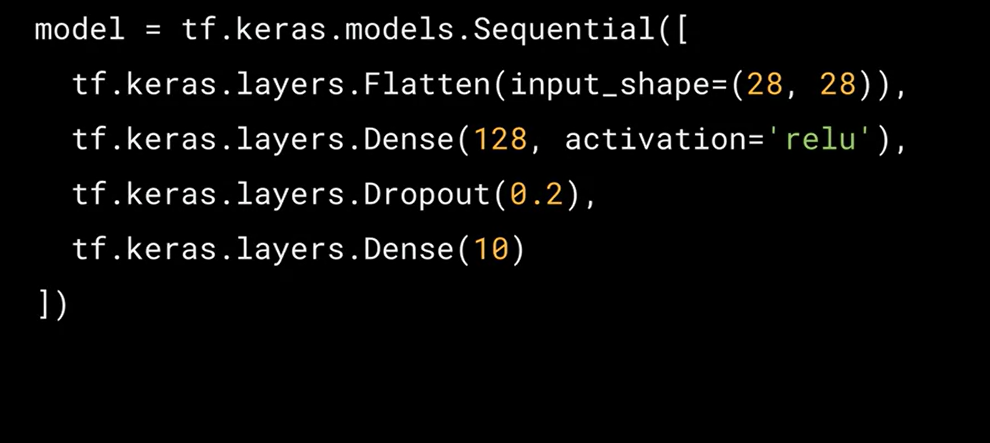
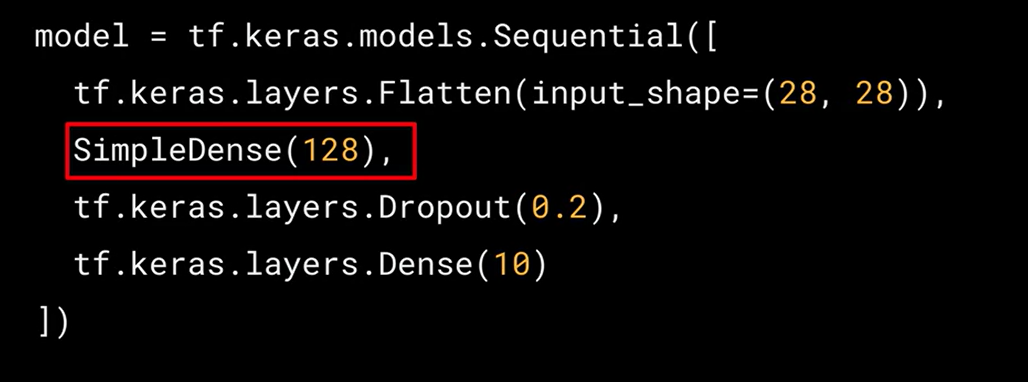

## Custom Simple Dense Layer

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np
class SimpleDense(Layer):
    def __init__(self, units=32):
        super(SimpleDense, self).__init__()
        self.units = units
    
    def build(self, input_shape): #Create the state of the layer(weights)
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            name = 'kernel',
            initial_value = w_init(shape=(input_shape[-1], self.units), dtype = 'float32'),
            trainable = True
        )

        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            name = 'bias',
            initial_value = w_init(shape=(self.units,), dtype = 'float32'),
            trainable = True
        )
    
    def call(self, inputs): # Define the computation from inputs to outputs
        ## Y = np.dot(inputs, self.w) + b
        return tf.matmul(inputs, self.w) + self.b
    
my_dense = SimpleDense(units=1)
x = tf.ones((1,2))
y = my_dense(x)
print(f"Computation output : {y.numpy()}")
print(f"Dense variables : {my_dense.variables}")
b_np = my_dense.b.numpy()
print(f"Bias Shape : {b_np.shape}")
w_np = my_dense.w.numpy()
print(f"Weight Shape : {w_np.shape}")
Y =  np.dot(x.numpy(),w_np) + b_np
print(f"Output Numpy : {Y}, with shape of {Y.shape}")

 

Computation output : [[0.0840039]]
Dense variables : [<tf.Variable 'simple_dense_19/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.04641327],
       [0.02379371]], dtype=float32)>, <tf.Variable 'simple_dense_19/bias:0' shape=(1,) dtype=float32, numpy=array([0.01379693], dtype=float32)>]
Bias Shape : (1,)
Weight Shape : (2, 1)
Output Numpy : [[0.0840039]], with shape of (1, 1)


## Train Custom Dense Layer

In [39]:
xs = np.array([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype = np.float32)
ys = np.array([-3,-1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19 ], dtype = np.float32)
assert xs.shape == ys.shape
assert len(xs) == len(ys)
for i in range(len(xs)):
    assert ys[i] == 2*xs[i] -1
print(xs.shape)
xs = np.reshape(xs, (1, -1))
ys = np.reshape(ys, (1, -1))
print(xs, ys, xs.shape, ys.shape)

(12,)
[[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]] [[-3. -1.  1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]] (1, 12) (1, 12)


In [47]:
x = tf.keras.Input(shape=(xs.shape[-1],1))
y = SimpleDense(1)(x)
model = tf.keras.Model(inputs=x, outputs = y)
model.summary()

model.compile(optimizer = 'sgd', loss = 'mse', metrics = 'mae')
model.fit(xs, ys, epochs = 1000, shuffle=True)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 12, 1)]           0         
                                                                 
 simple_dense_32 (SimpleDens  (None, 12, 1)            2         
 e)                                                              
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0


_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 319ms/step - loss: 111.0238 - mae: 8.6426
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 13.6205 - mae: 3.0235
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.0916 - mae: 1.2206
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7209 - mae: 0.7333
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5519 - mae: 0.6247
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5252 - mae: 0.6017
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5154 - mae: 0.5910
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5076 - mae: 0.5851
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5003 - mae: 0.5809
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4930 - mae: 0.576

In [52]:
model.evaluate(xs, ys)
xt = np.array([x for x in range(100, 13*100, 100)], dtype = np.float32)
xt = np.reshape(xt, (1, -1))
ypred = model(xt, training=False)
print(ypred)

1/1 [==============================] - 0s 23ms/step - loss: 2.6045e-07 - mae: 4.1903e-04
tf.Tensor(
[[[ 198.98897]
  [ 398.97708]
  [ 598.9652 ]
  [ 798.95337]
  [ 998.94147]
  [1198.9296 ]
  [1398.9177 ]
  [1598.9059 ]
  [1798.894  ]
  [1998.8821 ]
  [2198.87   ]
  [2398.8582 ]]], shape=(1, 12, 1), dtype=float32)


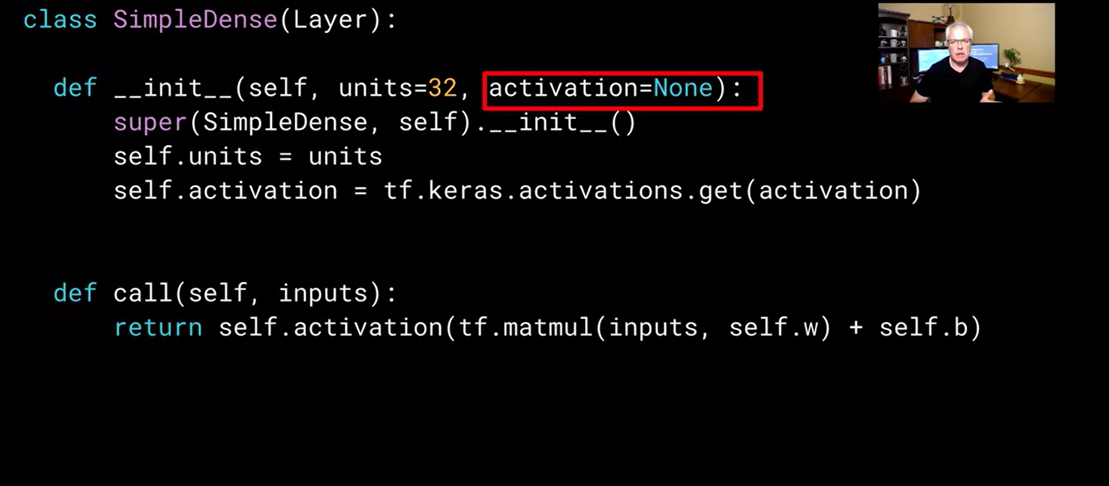